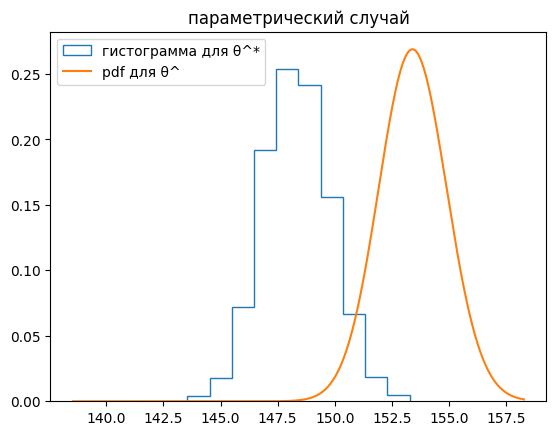

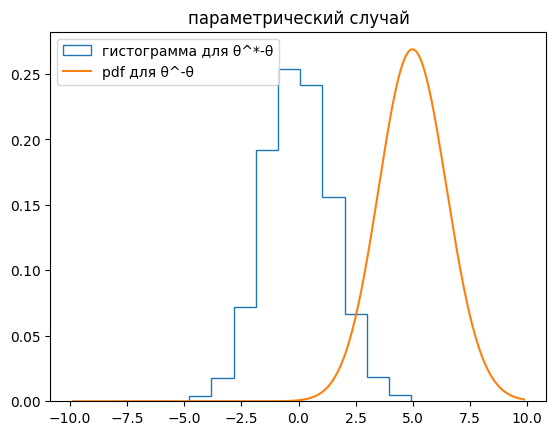

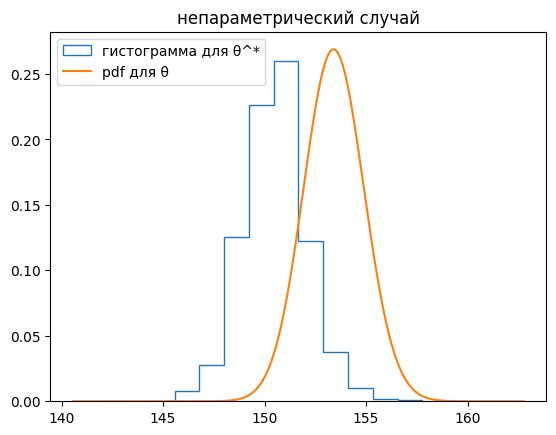

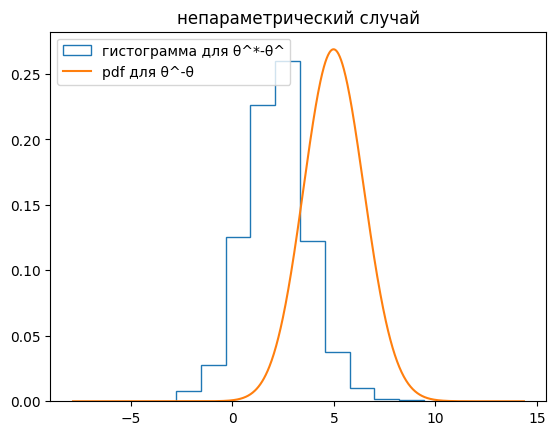

In [3]:
#1  #доделать
#a N(mu,1)
import numpy as np
import scipy.stats as stats
from scipy.stats import norm,uniform
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt,e,pi,log,exp

mu=5
N=1000
n=10000
theta=exp(mu)

samples = stats.norm.rvs(loc=mu,scale=1,size=n)
theta_t = exp(np.sum(samples)/n)
theta_tt=[0 for i in range(N)]
for j in range(N):
    samples2=stats.norm.rvs(loc=np.sum(samples)/n,scale=1,size=n)#новая выборка
    theta_tt[j]=exp(np.sum(samples2)/n)
a = np.array([theta_tt[i]-theta_t for i in range(N)])
#sigma= n* np.sum((theta_t*-theta_t)**2)/N
plt.hist(theta_tt,histtype ='step',density=True,label='гистограммa для θ^*')
x=np.linspace(np.min(theta_tt)-mu,np.max(theta_tt)+mu,1000)
plt.title('параметрический случай')
plt.plot(x,stats.lognorm.pdf(x,loc=mu,s=sqrt(1/n),scale=theta),label='pdf для θ^')
plt.legend()
plt.show()
plt.title('параметрический случай')
x=np.linspace(np.min(theta_tt)-theta-mu,np.max(theta_tt)-theta+mu,1000)
plt.hist(a,histtype ='step',density=True,label='гистограммa для θ^*-θ')
plt.plot(x,stats.lognorm.pdf(x+theta,loc=mu,s=sqrt(1/n),scale=theta),label='pdf для θ^-θ')
plt.legend()
plt.show()

#непараметрический случай
#1 гененрируем выборку N(mu,1)
samples =stats.norm.rvs(loc=mu,scale=1,size=n)
#2 пересобираем выборки из этой и собираем theta^
theta_tt=[0 for i in range(N)]
for i in range(N):
    samples_3=np.random.choice(samples,size=n,replace=True)
    theta_tt[i]=exp(np.mean(samples_3))

a1 = np.array([theta_tt[i]-theta_t for i in range(N)])
plt.hist(theta_tt,histtype ='step',density=True,label='гистограммa для θ^*')
x=np.linspace(np.min(theta_tt)-mu,np.max(theta_tt)+mu,1000)
plt.title('непараметрический случай')
plt.plot(x,stats.lognorm.pdf(x,loc=mu,s=sqrt(1/n),scale=theta),label='pdf для θ')
plt.legend()
plt.show()
plt.title('непараметрический случай')
x=np.linspace(np.min(theta_tt)-theta-mu,np.max(theta_tt)-theta+mu,1000)
plt.hist(a1,histtype ='step',density=True,label='гистограммa для θ^*-θ^')
plt.plot(x,stats.lognorm.pdf(x,loc=mu-theta,s=sqrt(1/n),scale=theta),label='pdf для θ^-θ')
plt.legend()
plt.show()

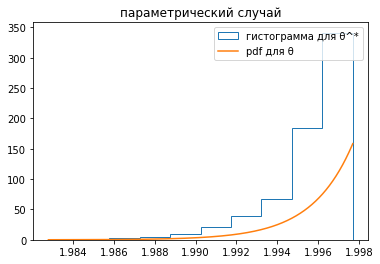

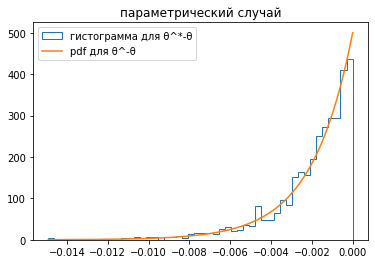

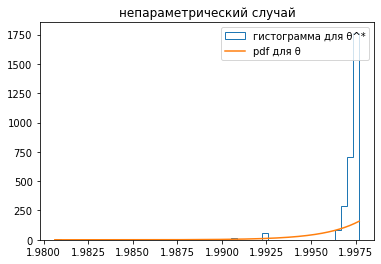

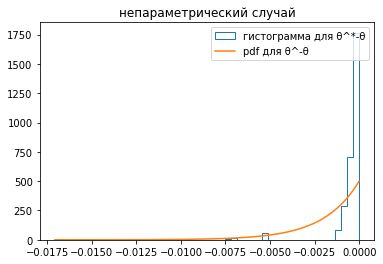

In [8]:
#2 
#b R[0,theta]

import numpy as np
import scipy.stats as stats
from scipy.stats import norm,uniform
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt,e,pi,log,exp

n=1000
N=1000
theta=2
samples=uniform.rvs(0,theta,n)
# ОМП для равномерного -максимум из выборки
theta_t=np.max(samples)

#параметрический случай
theta_tt=[0 for i in range(N)]
for i in range(N):
    samples_1=uniform.rvs(0,theta_t,n)
    theta_tt[i]=np.max(samples_1)

plt.hist(theta_tt,histtype ='step',density=True,label='гистограммa для θ^*')
x=np.linspace(np.min(theta_tt),np.max(theta_tt),1000)
plt.title('параметрический случай')
#плотность максимума : n*x^(n-1)/theta^n
plt.plot(x,n*(x**(n-1))/theta**n,label='pdf для θ')
plt.legend()
plt.show()

a = np.array([theta_tt[i]-theta_t for i in range(N)])
plt.title('параметрический случай')
x=np.linspace(np.min(a),np.max(a),1000)
plt.hist(a,histtype ='step',density=True,bins=50,label='гистограммa для θ^*-θ')
plt.plot(x,n*((x+theta)**(n-1))/theta**n,label='pdf для θ^-θ')
plt.legend()
plt.show()

#непараметрический случай
theta_tt=[0 for i in range(N)]
for i in range(N):
    samples_3=np.random.choice(samples,size=n,replace=True)
    theta_tt[i]=np.max(samples_3)
plt.hist(theta_tt,histtype ='step',density=True,bins=50,label='гистограммa для θ^*')
x=np.linspace(np.min(theta_tt),np.max(theta_tt),1000)
plt.title('непараметрический случай')
#плотность максимума : n*x^(n-1)/theta^n
plt.plot(x,n*(x**(n-1))/theta**n,label='pdf для θ')
plt.legend()
plt.show()

a = np.array([theta_tt[i]-theta_t for i in range(N)])
plt.title('непараметрический случай')
x=np.linspace(np.min(a),np.max(a),1000)
plt.hist(a,histtype ='step',density=True,bins=50,label='гистограммa для θ^*-θ')
plt.plot(x,n*((x+theta)**(n-1))/theta**n,label='pdf для θ^-θ')
plt.legend()
plt.show()


In [6]:
#2 
#интервалы для N(mu,1)
import numpy as np
import scipy.stats as stats
from scipy.stats import norm,uniform
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt,e,pi,log,exp

mu=3
theta=exp(mu)
alpha=0.05
n=1000
N=1000

samples=stats.norm.rvs(loc=mu,scale=1,size=n)
z1=stats.norm.ppf(alpha/2,loc=0,scale=1)
z2=stats.norm.ppf(1-alpha/2,loc=0,scale=1)

print('----Точные доверительные интервалы на основе ОМП----')
#для мю: mean(X)~N(mu,1/n)=> (mean(X)-mu)*sqrt(n)~N(0,1)=>mu [z2/sqrt(n)+mean(X),z1/sqrt(n)+mean(X) ]
mu1=-z2/sqrt(n)+np.mean(samples)
mu2=-z1/sqrt(n)+np.mean(samples)
print(f'для mu на основе ОМП(среднего): [{mu1}, {mu2}],для mu={mu}')
print(f'для theta на основе ОМП(exp(среднего)): [{exp(mu1)}, {exp(mu2)}], для theta={theta}')
print('\n')

#параметрические bootstrap интервалы во всех трех случаях
print('----Параметрическиe bootstrap интервалы во всех трех случаях ----')
theta_t=exp(np.sum(samples)/n)
theta_tt=np.zeros(N)
for j in range(N):
    samples2=stats.norm.rvs(loc=np.sum(samples)/n,scale=1,size=n)#новая выборка
    theta_tt[j]=exp(np.sum(samples2)/n)
sigma= n* np.sum((theta_tt-theta_t)**2)/N #асимптотическая дисперсия
#sqrt(n)*(theta_t-theta)/sqrt(sigma)~N(0,1)=> [mean(X)-sqrt(sigma/n)*z2,mean(X)-sqrt(sigma/n)*z1]
theta1=exp(np.mean(samples))-sqrt(sigma*1/n)*z2
theta2=exp(np.mean(samples))-sqrt(sigma*1/n)*z1
print(f'1-й способ через асимптотически нормальную оценку: [{theta1},{theta2}]')

theta_tt=np.sort(theta_tt)
print(f'2-й способ percentile parametric bootstrap: [{np.quantile(theta_tt,alpha/2)},{np.quantile(theta_tt,1-alpha/2)}]')
print(f'3-й способ pivotal parametric bootstrap: [{2*theta_t-np.quantile(theta_tt,1-alpha/2)},{2*theta_t-np.quantile(theta_tt,alpha/2)}]')
print('\n')
#непараметрические  bootstrap интервалы во всех трех случаях
print('----Неараметрическиe bootstrap интервалы во всех трех случаях ----')
theta_tt=np.zeros(N)
for i in range(N):
    samples_3=np.random.choice(samples,size=n,replace=True)
    theta_tt[i]=exp(np.mean(samples_3))
sigma= n* np.sum((theta_tt-theta_t)**2)/N
theta1=exp(np.mean(samples))-sqrt(sigma*1/n)*z2
theta2=exp(np.mean(samples))-sqrt(sigma*1/n)*z1
print(f'1-й способ через асимптотически нормальную оценку: [{theta1},{theta2}]')
theta_tt=np.sort(theta_tt)
print(f'2-й способ percentile parametric bootstrap: [{np.quantile(theta_tt,alpha/2)},{np.quantile(theta_tt,1-alpha/2)}]')
print(f'3-й способ pivotal parametric bootstrap: [{2*theta_t-np.quantile(theta_tt,1-alpha/2)},{2*theta_t-np.quantile(theta_tt,alpha/2)}]')


----Точные доверительные интервалы на основе ОМП----
для mu на основе ОМП(среднего): [2.9267801457871307, 3.0507391522480427],для mu=3
для theta на основе ОМП(exp(среднего)): [18.667427231602385, 21.130957646402635], для theta=20.085536923187668


----Параметрическиe bootstrap интервалы во всех трех случаях ----
1-й способ через асимптотически нормальную оценку: [18.645926914111765,21.076138198281033]
2-й способ percentile parametric bootstrap: [18.689385795041712,21.111454783754777]
3-й способ pivotal parametric bootstrap: [18.61061032863802,21.032679317351086]


----Неараметрическиe bootstrap интервалы во всех трех случаях ----
1-й способ через асимптотически нормальную оценку: [18.654280761224925,21.067784351167873]
2-й способ percentile parametric bootstrap: [18.670341734196374,21.051623315751563]
3-й способ pivotal parametric bootstrap: [18.670441796641235,21.051723378196424]


In [10]:
#2 интервалы для R(0,theta) доделать

import numpy as np
import scipy.stats as stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt,e,pi,log,exp

theta=2
alpha=0.000001
n=100
N=100

samples=uniform.rvs(0,theta,n)
# ОМП для равномерного -максимум из выборки
theta_t=np.max(samples)

#параметрический случай
theta_tt=[0 for i in range(N)]
for i in range(N):
    samples_1=uniform.rvs(0,theta_t,n)
    theta_tt[i]=np.max(samples_1)

print('----Параметрическиe bootstrap интервалы во всех трех случаях ----')
theta_tt=np.sort(theta_tt)
print(f'2-й способ percentile parametric bootstrap: [{np.quantile(theta_tt,alpha/2)},{np.quantile(theta_tt,1-alpha/2)}]')
print(f'3-й способ pivotal parametric bootstrap: [{2*theta_t-np.quantile(theta_tt,1-alpha/2)},{2*theta_t-np.quantile(theta_tt,alpha/2)}]')
print('\n')

print('----Неараметрическиe bootstrap интервалы во всех трех случаях ----')
theta_tt=np.zeros(N)
for i in range(N):
    samples_3=np.random.choice(samples,size=n,replace=True)
    theta_tt[i]=np.max(samples_3)
theta_tt=np.sort(theta_tt)
#print(theta_t)
print(f'2-й способ percentile parametric bootstrap: [{np.quantile(theta_tt,alpha/2)},{np.quantile(theta_tt,1-alpha/2)}]')
print(f'3-й способ pivotal parametric bootstrap: [{2*theta_t-np.quantile(theta_tt,1-alpha/2)},{2*theta_t-np.quantile(theta_tt,alpha/2)}]')
print('\n')
#print(theta_tt)

----Параметрическиe bootstrap интервалы во всех трех случаях ----
2-й способ percentile parametric bootstrap: [1.8946198541146713,1.9982515111419727]
3-й способ pivotal parametric bootstrap: [1.9983401779432997,2.101971834970601]


----Неараметрическиe bootstrap интервалы во всех трех случаях ----
2-й способ percentile parametric bootstrap: [1.7758996181530404,1.9982958445426362]
3-й способ pivotal parametric bootstrap: [1.9982958445426362,2.220692070932232]




In [11]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#3
alpha = 0.05
m = 5
n = 10000
x = scipy.stats.cauchy.rvs(m,size=n) #выборка

#a
med = np.median(x) #выборочная медиана - асимптотически нормальная оценка медианы
l1 = med - scipy.stats.norm.ppf(1-alpha/2) * (1/scipy.stats.cauchy.pdf(med,loc=med))/2/np.sqrt(n)
r1 = med + scipy.stats.norm.ppf(1-alpha/2) * (1/scipy.stats.cauchy.pdf(med,loc=med))/2/np.sqrt(n) #(l1,r1) - доверительный интервал
print(l1, r1,'\n')

#b
theta = np.median(x)
N = 1000
theta_new = []
for i in range(N): #генерируем выборки из исходной
    index = scipy.stats.randint.rvs(0,n,size=n) #выбор с возвращением
    x1 = []
    for i in index:
        x1.append(x[i])
    theta_new.append(np.median(x1)) #считаем медианы
theta_new = np.sort(theta_new)
l2 = 2*theta - theta_new[round(N-N*alpha/2)]
r2 = 2*theta - theta_new[round(N*alpha/2)]
print(l2,r2)

4.9692182489105 5.030792333461815 

4.969033291742918 5.0291591276124485


In [16]:
#4
f = open('sydrain.txt')
x = f.readlines()
x.pop(0)
x = np.array([float(a) for a in x])
n = np.size(x)
E = np.mean(x)
M = np.median(x)

alpha=0.1
N = 1000
E_new = []
M_new = []
for i in range(N): 
    index = scipy.stats.randint.rvs(0,n,size=n)
    x1 = []
    for i in index:
        x1.append(x[i])
    E_new.append(np.mean(x1))
    M_new.append(np.median(x1))
E_new = np.sort(E_new)
M_new = np.sort(M_new)
e1 = 2*E - E_new[round(N-N*alpha/2)]
e2 = 2*E - E_new[round(N*alpha/2)]
m1 = 2*M - M_new[round(N-N*alpha/2)]
m2 = 2*M - M_new[round(N*alpha/2)]
print('mean\n',e1,e2)
print('median\n',m1,m2)

mean
 120.2446808510638 153.14042553191484
median
 119.39999999999998 168.39999999999998


In [7]:
import scipy
alpha = 0.05
print(scipy.stats.chi2.ppf(1-alpha,df=3))

7.814727903251179
